In [73]:
import numpy as np
import pandas as pd
data = pd.read_csv("LR_708mb - Sheet1.csv")
data

,executor_instances,executor_memory,executor_cores,driver_memory,driver_cores,scheduler_mode,total_uptime(min),Total_Uptime(sec),execution_time
0,3,1,1,1,1,FIFO,3.9,234,226
1,3,1,2,1,2,FIFO,2.6,156,151
2,3,1,2,1,2,FAIR,2.4,144,135
3,8,1,2,1,2,FAIR,1.5,90,97
4,8,1,2,1,2,FIFO,1.5,90,79
5,8,2,2,1,2,FAIR,1.6,96,86
6,8,2,2,1,2,FIFO,1.9,114,103
7,4,2,2,1,2,FAIR,1.8,108,98
8,4,2,2,1,2,FIFO,1.9,114,105
9,4,4,4,2,2,FAIR,1.3,78,74


In [74]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
schedulermode_encoded=le.fit_transform(data['scheduler_mode'].values)
schedulermode_encoded

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [75]:
x = np.array(list(zip(data['executor_instances'],data['executor_memory'],data['executor_cores'],data['driver_memory'],data['driver_cores'],schedulermode_encoded)))
x

array([[ 3,  1,  1,  1,  1,  1],
       [ 3,  1,  2,  1,  2,  1],
       [ 3,  1,  2,  1,  2,  0],
       [ 8,  1,  2,  1,  2,  0],
       [ 8,  1,  2,  1,  2,  1],
       [ 8,  2,  2,  1,  2,  0],
       [ 8,  2,  2,  1,  2,  1],
       [ 4,  2,  2,  1,  2,  0],
       [ 4,  2,  2,  1,  2,  1],
       [ 4,  4,  4,  2,  2,  0],
       [ 4,  4,  4,  2,  2,  1],
       [ 4,  4,  4,  4,  4,  0],
       [ 4,  4,  4,  4,  4,  1],
       [ 4,  8,  4,  8,  4,  0],
       [ 4,  8,  4,  8,  4,  1],
       [ 4, 16,  4, 16,  4,  0],
       [ 4, 16,  4,  4,  4,  0],
       [ 4,  8,  8,  4,  4,  0],
       [ 4,  8,  8,  4,  8,  0],
       [ 4,  8,  8,  8,  8,  0],
       [ 4,  8, 16,  8, 16,  0],
       [ 4, 16, 16, 16, 16,  0],
       [15,  8, 16,  8, 16,  0],
       [19,  8, 16,  8, 16,  0],
       [10,  8, 16,  8, 16,  0],
       [ 8, 12, 16, 12, 16,  0],
       [ 6, 12, 16, 12, 16,  0],
       [10, 12, 16, 12, 16,  0],
       [ 8, 14, 16, 12, 16,  0],
       [ 8, 12, 16, 14, 16,  0],
       [ 8

In [76]:
y = data.iloc[:,-1].values
y

array([226, 151, 135,  97,  79,  86, 103,  98, 105,  74,  81,  73,  82,
        57,  72,  83,  70,  58,  60,  56,  55,  60,  65,  65,  65,  53,
        54,  55,  62,  52,  60,  60,  54,  59,  78,  58,  58,  77,  56,
        54,  62,  55,  54,  67,  67,  63,  66,  68,  68,  74], dtype=int64)

In [77]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.2)

In [78]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression()

In [79]:
Y_Pred = regressor.predict(X_Test)

In [80]:
Y_Pred

array([ 92.7348982 , 115.30613335,  81.44663108,  54.39709432,
        79.02772395,  97.82409856,  32.98880262,  52.80828139,
        57.71550656,  67.34288793])

In [81]:
Y_Test

array([97, 82, 60, 53, 74, 77, 58, 65, 54, 67], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score, mean_squared_error
print("mse:",mean_squared_error(Y_Test, Y_Pred))

mse: 283.6441116413006


In [83]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
rf.fit(X_Train,Y_Train)

RandomForestRegressor()

In [84]:
Y_Pred = rf.predict(X_Test)

In [85]:
print(np.round_(Y_Pred))

[96. 75. 59. 55. 66. 70. 61. 65. 55. 64.]


In [86]:
print(Y_Test)

[97 82 60 53 74 77 58 65 54 67]


In [87]:
from sklearn.metrics import accuracy_score, mean_squared_error
print("mse:",mean_squared_error(Y_Test, Y_Pred))

mse: 18.83475999999998


Text(0.5, 0, 'Feature Importance')

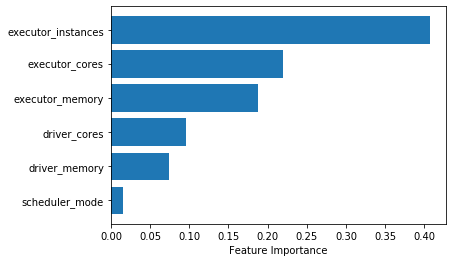

In [88]:
df = pd.DataFrame(x, columns = ['executor_instances','executor_memory','executor_cores','driver_memory','driver_cores','scheduler_mode'])

import matplotlib.pyplot as plt
sort = rf.feature_importances_.argsort()
plt.barh(df.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [89]:
df = pd.DataFrame(x, columns = ['executor_instances','executor_memory','executor_cores','driver_memory','driver_cores','scheduler_mode'])


feature_importances_df = pd.DataFrame(
    {"feature":list(df.columns),"importance":rf.feature_importances_}
).sort_values("importance",ascending=False)

feature_importances_df

,feature,importance
0,executor_instances,0.407010
2,executor_cores,0.220247
1,executor_memory,0.187200
4,driver_cores,0.095439
3,driver_memory,0.074298
5,scheduler_mode,0.015805


In [99]:
pred1=rf.predict([[8,12,16,12,16,0]])
pred1

array([55.15])